# Elastica Examples

This notebook contains examples and visualizations of the elastica functions implemented in the `elastica-py` package.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# add parent directory to path
import sys
import os
sys.path.append(os.path.abspath('..'))

from src.elastica import elastica_in_TI
from src.visualization.plotting import plot_curves
from src.utils.curvature import find_curvature_from_points
from src.utils.interpolation import poly_interpolation
from src.visualization.drawing import build_circle, draw_left_inducer, draw_right_inducer


## Example 1: Elastica in Tangent Bundle

This example demonstrates how to compute the elastica in the tangent bundle for a given set of parameters.

Elastica in TI: err:0.000428 c:-0.000015 phi:0.000098 g0:0.000103 l=2.721801


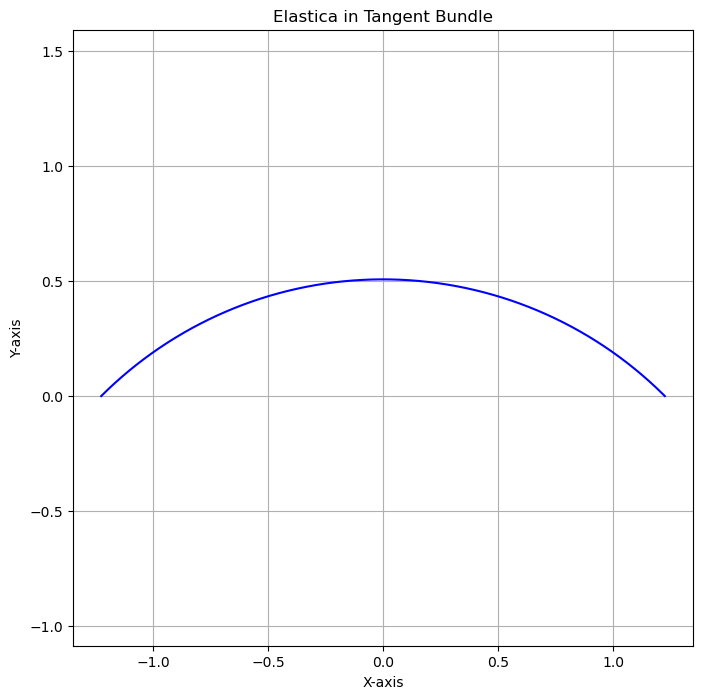

In [2]:
# Parameters
dx = 1.2247
R = np.sqrt(3)

# Compute elastica
[tl, x, y, theta, dtheta, ddtheta, err] = elastica_in_TI(-dx, 0, 45, -1/R, dx, 0, -45, -1/R, 0.001, [0, 0, 0, np.sqrt(3)*np.pi/2], 1)

# Plot the results
fig = plt.figure(figsize=(8, 8))
plot_curves(fig, x, y, color='b')


## Example 2: Drawing Inducers

This example shows how to draw left and right inducers using the provided functions.

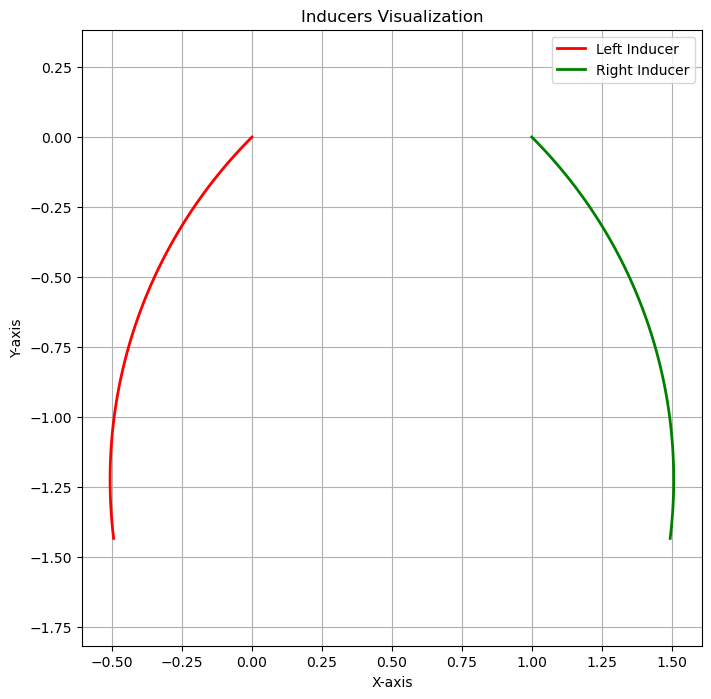

In [3]:
# Parameters for the inducers
L = [0, 0, 45, -1/np.sqrt(3)]  # Left inducer parameters
R = [1, 1, -45, -1/np.sqrt(3)]  # Right inducer parameters
arc_perimeter = np.pi / 2  # Example arc perimeter

# Draw inducers
plt.figure(figsize=(8, 8))
M_left = draw_left_inducer(L[0], L[1], L[2], L[3], arc_perimeter)
M_right = draw_right_inducer(R[0], R[1], R[2], R[3], arc_perimeter)

# Fix for right inducer - adjusting the imaginary part
# This is a workaround to ensure the right inducer is plotted correctly
M_right_fixed = M_right.real + 1j * (M_right.imag - 1)

# Plot with the fixed coordinates
plt.plot(M_left.real, M_left.imag, 'r', linewidth=2, label='Left Inducer')
plt.plot(M_right_fixed.real, M_right_fixed.imag, 'g', linewidth=2, label='Right Inducer')
plt.title('Inducers Visualization')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()


## Example 3: Curvature Calculation

This example demonstrates how to calculate curvature from three points.

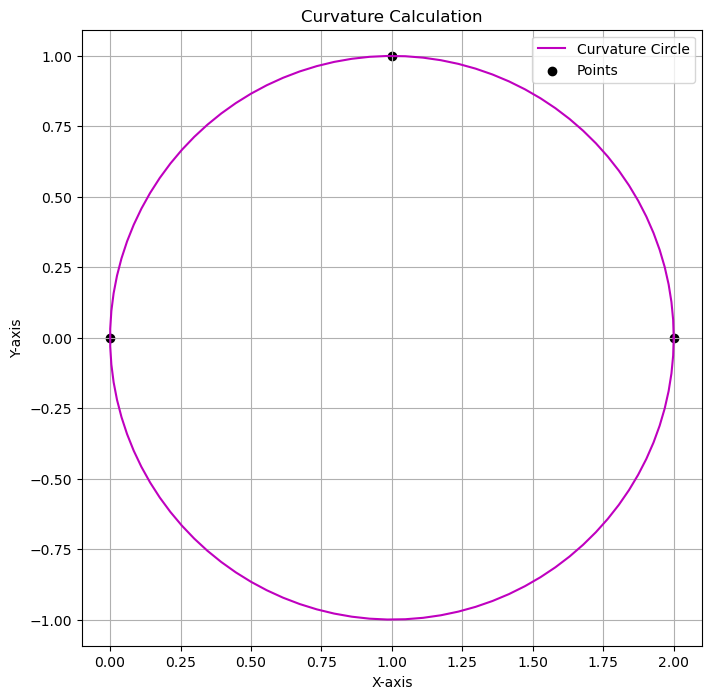

In [4]:
# Points for curvature calculation
x0, y0 = 0, 0
x1, y1 = 1, 1
x2, y2 = 2, 0

# Calculate curvature
[kappa, theta, circ] = find_curvature_from_points(x0, y0, x1, y1, x2, y2)

# Plot the curvature
plt.figure(figsize=(8, 8))
plt.plot(circ.real, circ.imag, 'm', label='Curvature Circle')
plt.scatter([x0, x1, x2], [y0, y1, y2], color='black', label='Points')
plt.title('Curvature Calculation')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()

```markdown
## Example 4: Combined Visualization of Inducers and Elastica TI Curve

In this example, we will visualize the left and right inducers along with the elastica TI curve on the same plot. This combined visualization helps to understand the relationship between the inducers and the elastica curve in the tangent bundle. The inducers will be represented in red and green, while the elastica curve will be shown in blue.
```

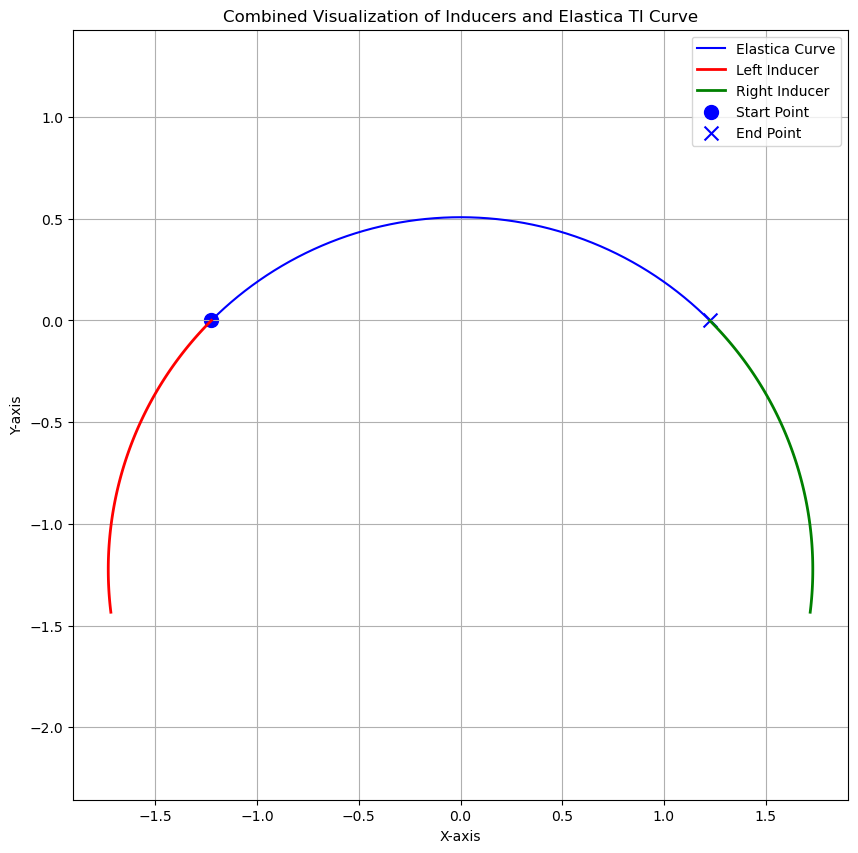

In [12]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

# Plot elastica curve
ax.plot(x, y, color='b', label='Elastica Curve')

L = [-dx, 0, 45, -1/np.sqrt(3)]  # Left inducer parameters
R = [dx, 0, -45, -1/np.sqrt(3)]  # Right inducer parameters
arc_perimeter = np.pi / 2  # Example arc perimeter
M_left = draw_left_inducer(L[0], L[1], L[2], L[3], arc_perimeter)
M_right = draw_right_inducer(R[0], R[1], R[2], R[3], arc_perimeter)

# Plot inducers
ax.plot(M_left.real, M_left.imag, 'r', linewidth=2, label='Left Inducer')
ax.plot(M_right.real, M_right.imag, 'g', linewidth=2, label='Right Inducer')

# Add endpoints markers for clarity
ax.scatter(x[0], y[0], color='blue', s=100, marker='o', label='Start Point')
ax.scatter(x[-1], y[-1], color='blue', s=100, marker='x', label='End Point')

# Format the plot
ax.set_title('Combined Visualization of Inducers and Elastica TI Curve')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.axis('equal')
ax.grid(True)
ax.legend(loc='best')
plt.show()